# Tugas 05 Machine Learning (SVM)

Nama : Muh.Ikhsan

NIM  : H071191049

## Praprocessing

In [1]:
!pip install kaggle
import os
os.environ["KAGGLE_USERNAME"] = "toku404"
os.environ["KAGGLE_KEY"] = "5d32a9c4e5982f55d939d5516b9172d8"

In [2]:
!kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 3.32MB/s]


In [3]:
!unzip -q /content/heart-attack-analysis-prediction-dataset.zip

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, fbeta_score, roc_auc_score, mean_squared_error

Dataset yang saya gunakan adalah dataset tentang serangan jantung, berikut sumber datasetnya : https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

adapun attribut dalam dataset ini adalah :

- Umur : Umur pasien
- Jenis Kelamin : Jenis Kelamin pasien
- exang: angina yang diinduksi olahraga (1 = ya; 0 = tidak)
- ca: jumlah kapal besar (0-3)
- cp : jenis nyeri dada jenis nyeri dada
  - Nilai 1: angina tipikal
  - Nilai 2: angina atipikal
  - Nilai 3: nyeri non-angina
  - Nilai 4: tanpa gejala
- trtbps : tekanan darah istirahat (dalam mm Hg)
- chol : kolestoral dalam mg/dl diambil melalui sensor BMI
- fbs : (gula darah puasa > 120 mg/dl) (1 = benar; 0 = salah)
- rest_ecg : hasil elektrokardiografi istirahat
  - Nilai 0: biasa
  - Nilai 1: memiliki kelainan gelombang ST-T (pembalikan gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)
  - Nilai 2: menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes
- thalach : detak jantung maksimum tercapai
- target : 0= lebih kecil kemungkinan terkena serangan jantung 1= lebih banyak kemungkinan terkena serangan jantung

In [5]:
# Untuk import data dan dijadikan dataframe
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.output.unique()

array([1, 0])

In [10]:
df.shape

(303, 14)

In [11]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

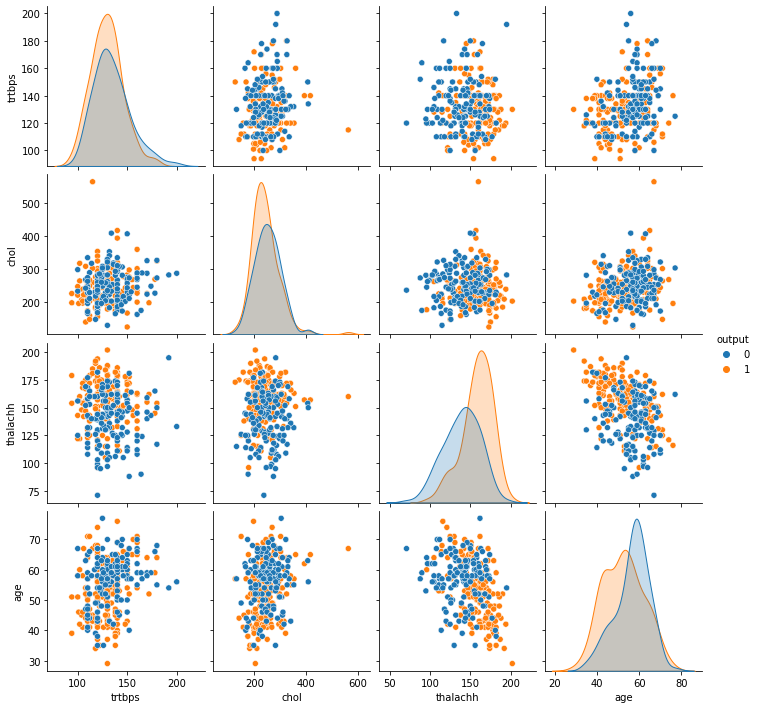

In [12]:
sns.pairplot(df, hue='output',vars = ['trtbps','chol','thalachh','age'])

In [13]:
X = df.drop(columns="output")
y = df.output
column_name = list(X.columns) 

In [14]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

Normalisasi

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
df = pd.DataFrame(data=data_scaled, columns= column_name)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


Membagi data jadi data test dan data train

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [18]:
len(X_test), len(X_train)

(91, 212)

Menampilkan sebaran data detak jantung maksimum berdasar umur apakah terkena serangan jantung atau tidak 

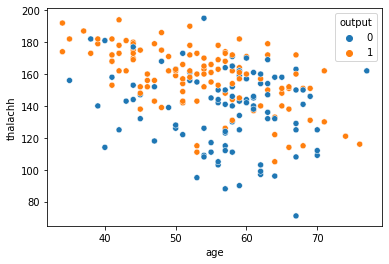

In [19]:
sns.scatterplot(x=X_train['age'],y=X_train['thalachh'],hue=y_train)

## SVM

Membuat Model

In [20]:
model_svm = SVC(kernel="poly")
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Melakukan prediksi dari data test berdasarkan model yang dibuat

In [21]:
predict_svm = model_svm.predict(X_test)
predict_svm

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1])

Convolusion Matriks
```
---------------------------------
| True_Positif  | False Positif |
|-------------  | --------------|
| False Negatif | True Negatif  |
---------------------------------
```


In [22]:
cm_svm = confusion_matrix(y_test, predict_svm)
cm_svm

array([[20, 21],
       [10, 40]])

In [23]:
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.67      0.49      0.56        41
           1       0.66      0.80      0.72        50

    accuracy                           0.66        91
   macro avg       0.66      0.64      0.64        91
weighted avg       0.66      0.66      0.65        91



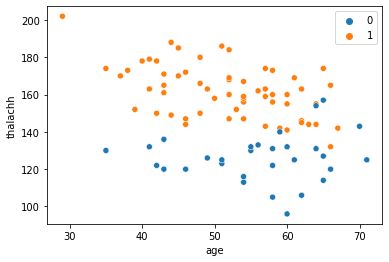

In [24]:
sns.scatterplot(x=X_test['age'],y=X_test['thalachh'],hue=predict_svm)

In [25]:
print(roc_auc_score(y_test, predict_svm))

0.6439024390243903


## SVR

In [26]:
model_svr = SVR(kernel="rbf")
model_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
predict_svr = model_svr.predict(X_test)
predict_svr

array([0.46540078, 0.50107449, 0.82747233, 0.21163911, 0.87399645,
       0.78623313, 0.89897552, 0.87060478, 0.53522062, 0.59884706,
       0.35063959, 0.69266598, 0.65313913, 0.60463503, 0.81177875,
       0.9965481 , 1.06884212, 0.45867492, 0.70142276, 0.85690132,
       0.94820918, 0.56003296, 1.04597023, 0.50388297, 0.58235821,
       1.19990158, 0.18420219, 0.94462108, 0.78002574, 0.96246765,
       0.6201031 , 0.0693183 , 0.46730763, 0.66167504, 0.69021387,
       0.8464402 , 0.70386237, 0.34222831, 0.47462359, 0.19968286,
       0.72682853, 0.45308515, 0.7262222 , 0.43832756, 0.80347759,
       0.96930372, 0.84536784, 0.90349231, 0.61513797, 0.99596861,
       0.79145037, 0.37895669, 0.7726533 , 0.59124283, 0.86718321,
       0.39516324, 0.32212249, 0.4045974 , 1.04256119, 0.35519711,
       0.65866197, 0.7063825 , 0.8078361 , 0.80048207, 0.83267775,
       0.22144772, 0.36454208, 0.60292355, 0.13384027, 0.90044592,
       0.6295093 , 0.83674304, 0.47444728, 0.52766425, 0.65740

In [28]:
cm_svr = confusion_matrix(y_test, predict_svr.round())
cm_svr

array([[19, 22],
       [ 7, 43]])

In [29]:
print(classification_report(y_test, predict_svr.round()))

              precision    recall  f1-score   support

           0       0.73      0.46      0.57        41
           1       0.66      0.86      0.75        50

    accuracy                           0.68        91
   macro avg       0.70      0.66      0.66        91
weighted avg       0.69      0.68      0.67        91



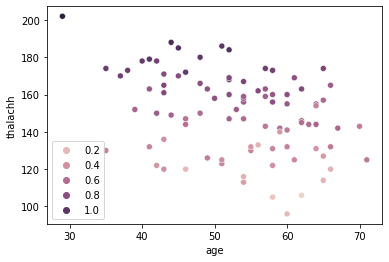

In [30]:
sns.scatterplot(x=X_test['age'],y=X_test['thalachh'],hue=predict_svr)

In [31]:
print(roc_auc_score(y_test, predict_svr))

0.7634146341463415
